In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import backtest
import data
import evaluation

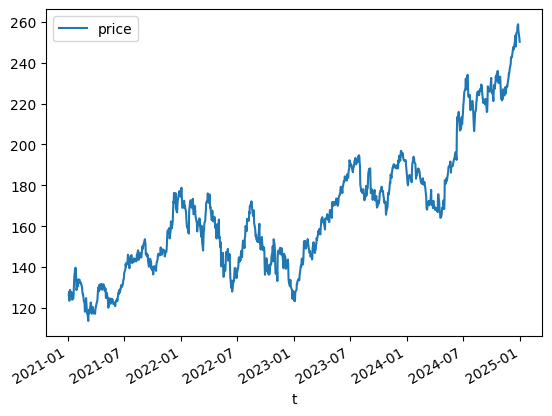

In [2]:
price_df = data.load_hist_data()
price_df.plot(x='t', y='price')
plt.show()

In [3]:
def ma_price_diff_signal(price_df, period=50):
    signal = np.sign(price_df['price'] - price_df['price'].rolling(period).mean()).fillna(0)
    return pd.DataFrame({'t': price_df['t'], 'signal': signal})

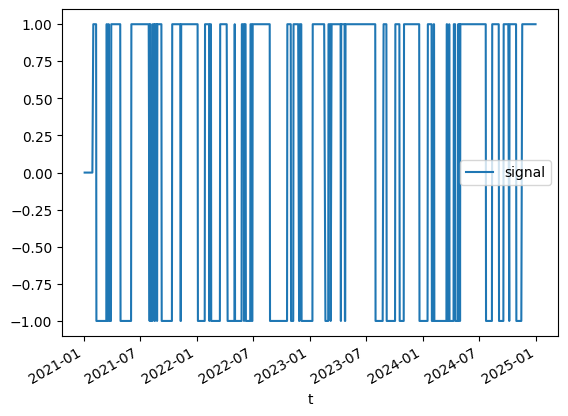

In [4]:
signal_df = ma_price_diff_signal(price_df, period=20)
signal_df.plot(x='t', y='signal')
plt.show()

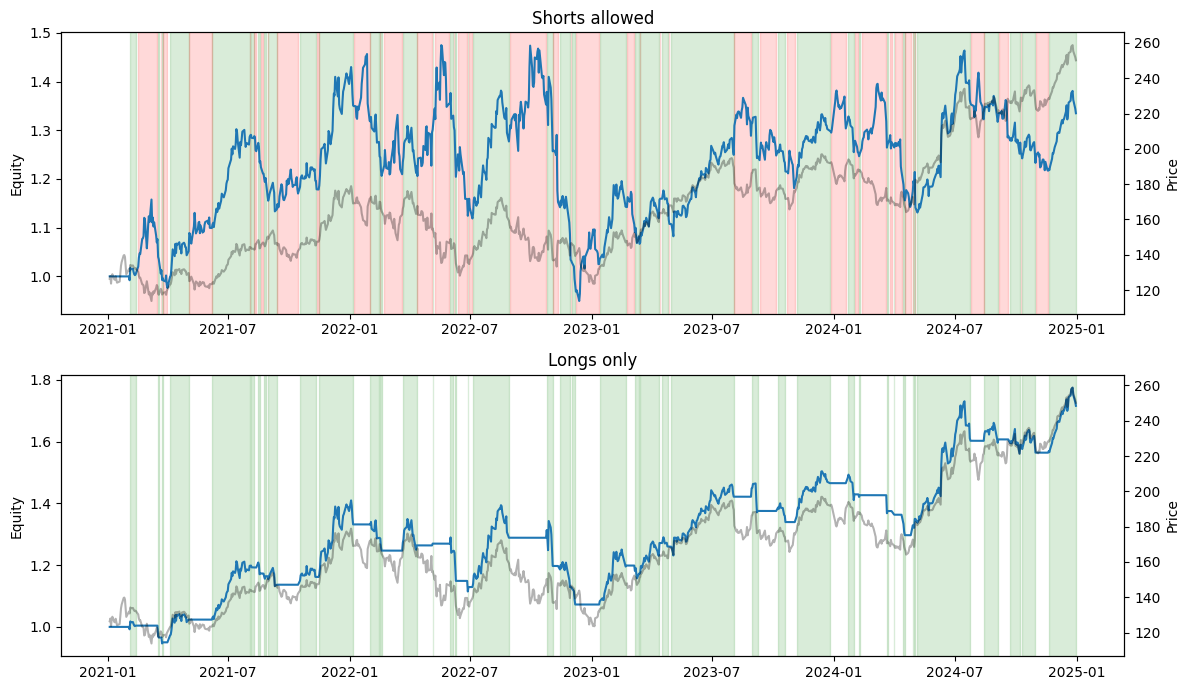

In [5]:
shorts_settings = {
    'Shorts allowed': True,
    'Longs only': False
}
spread = 0.0002
return_df_dct = {}

fig, axes = plt.subplots(2, 1, figsize=(12, 7))
for setting, ax in zip(shorts_settings, axes.flatten()):
    ax2 = ax.twinx()
    return_df = backtest.backtester(price_df, signal_df, spread=spread, spread_is_relative=True, allow_shorts=shorts_settings[setting])
    evaluation.draw_results(ax, ax2, return_df, price_df, fig_title=setting)
    return_df_dct[setting] = return_df

plt.tight_layout()
plt.show()

In [6]:
stats_dct = {}
for setting, return_df in return_df_dct.items():
    trade_df = backtest.build_trade_pairs(return_df)
    evaluation.assert_pnl_invariant(return_df, trade_df)
    stats_dct[setting] = evaluation.generate_stats_report(return_df, trade_df)
pd.DataFrame({setting: evaluation.format_stats_for_display(dct) for setting, dct in stats_dct.items()})

,Shorts allowed,Longs only
Annualized Sharpe ratio,0.408,0.862
"Maximum drawdown magnitude, equity units",0.525,0.337
"Maximum drawdown duration, bars",657,372
Number of trades,83,83
Number of held positions,82,41
"Average position holding period, bars",16.9,19.3
Win rate (%),39,39
